<a href="https://colab.research.google.com/github/Ater97/Threads/blob/master/Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from threading import Thread
from time import sleep

def threaded_function(arg):
  for i in range(arg):
    print ("running")
    sleep(1)
    
if __name__ == "__main__":
  thread = Thread(target = threaded_function, args = (10,))
  thread.start()
  thread.join()
  print ("thread finished...exiting")

running
running
running
running
running
running
running
running
running
running
thread finished...exiting


In [0]:
import threading
import time
def fun1(a,b):
  time.sleep(1)
  c = a + b
  print(c)

thread1 = threading.Thread(target = fun1, args =(12,10))
thread1.start()

thread2 = threading.Thread(target = fun1, args =(10,17))
thread2.start()

thread1.join()
thread2.join()
print("Total number of threads ",threading.activeCount())
print("List of threads ",threading.enumerate())

22
27
Total number of threads  5
List of threads  [<_MainThread(MainThread, started 139770782795648)>, <Thread(Thread-2, started daemon 139770631231232)>, <Heartbeat(Thread-3, started daemon 139770622838528)>, <HistorySavingThread(IPythonHistorySavingThread, started 139770597660416)>, <ParentPollerUnix(Thread-1, started daemon 139770540218112)>]


In [69]:
#number2
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# Supress warnig
import os 
os.environ['TF_CPP_MiN_LOG_LEVEL']='2'

# Number of classes 
num_classes = 10

# Sizes of batch and # of epochs of data
batch_size = 128
epochs = 24

# Input image dimensions
img_rows, img_cols = 28, 28

# data, shuffled and split between and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Deal with format issues between different backends
if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
  
# Type convert and scale the test and trainig data  
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /=255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = Sequential()
#convolution
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#categori...
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Define compile to minimize categoricl loss, use ada delta optimized
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

#Train model and test
import threading
from time import sleep
from multiprocessing.dummy import Pool as ThreadPool
from multiprocessing import Process
import multiprocessing

def train(i):
  print("Thread number" + str(i))
  hist = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=1,
                verbose=1,
                validation_data=(x_test, y_test))

Procs =[]
#epochs
def withProcess():
  print("Thread started")
  for i in range(0,3):
    sleep(3)
    p = Process(target=train, args=(i,))
    sleep(3)
    Procs.append(p)
    sleep(3)
    p.start()
    
  print("Join")
  for t in Procs:
    t.join()
    print("Thread joined")
  print("Threads done")
  
def withThreadPool():
  print("thread1")
  pool = ThreadPool(3)
  result = pool.map(train,Pros)
  pool.close()
  pool.join()
  
def withPool():
  if __name__ == "__main__":
    pool = multiprocessing.Pool()
    pool.map(train,range(0,3))
    pool.close()
    pool.join()
    
#withPool()
#withThreadPool()
withProcess()
# Evaluate the model with the test data to get the scores on "real" data.
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Tets accuracy',score[1])


#  Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
epoch_list = list(range(1, len(hist.history['acc']) + 1)) #values for x axis
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()



Thread number1
Train on 60000 samples, validate on 10000 samples
Epoch 1/1


FailedPreconditionError: ignored

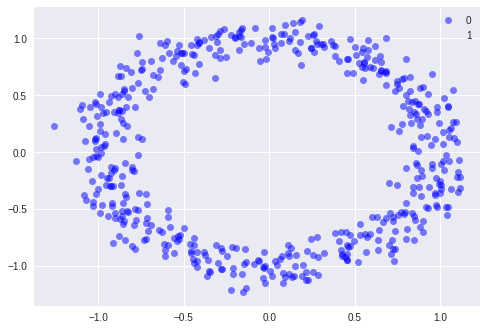

300/300 [==============================] - 0s 823us/sample - loss: 0.1550 - acc: 0.9500


Test loss: 0.15502569805830718 Test accurary: 0.95


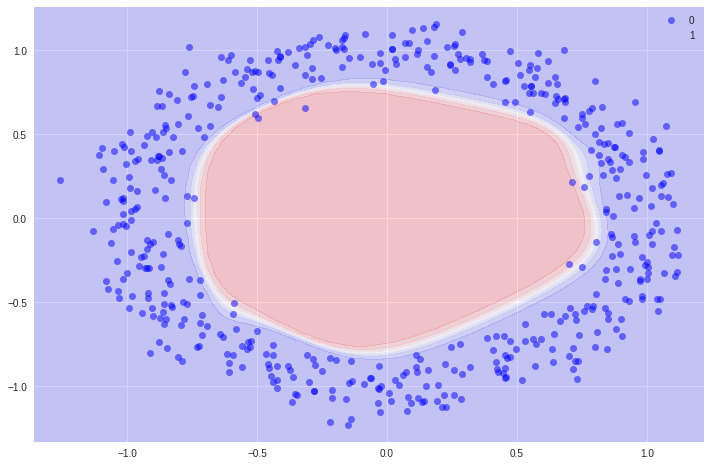

In [48]:
#Imports
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

#Helper functions

# plot the data on a figure
def plot_data(pl,X,y):
  #plot class where y==0
  pl.plot(X[y==0,0], X[y==0,1], 'ob', alpha=0.5)
  #plot class where y==1
  pl.plot(X[y==1,0], X[y==1,1], 'xr', alpha=0.5)
  pl.legend(['0', '1'])
  return pl

# common function that draws thw decision boundaries
def plot_decision_boundary(model, X, y):
  amin,bmin = X.min(axis=0) - 0.1
  amax,bmax = X.max(axis=0) + 0.1
  hticks = np.linspace(amin,amax,101)
  vticks = np.linspace(bmin,bmax,101)
  
  aa,bb = np.meshgrid(hticks, vticks)
  ab = np.c_[aa.ravel(), bb.ravel()]
  
  # make prediction with the model and reshape the output so contours can plot it
  c = model.predict(ab)
  Z = c.reshape(aa.shape)
  
  plt.figure(figsize=(12, 8))
  # plot the contour
  plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
  # plot the moons of data
  plot_data(plt, X, y)
  
  return plt
X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)

pl = plot_data(plt, X, y)
pl.show()
# split the data into training and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Create the keras model
#from keras import backend as kbe
#from keras.model import Sequential
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# simple sequential model
model = Sequential()

model.add(Dense(4, input_shape=(2,), activation="tanh"))
model.add(Dense(4, activation="tanh"))


model.add(Dense(1, input_shape=(2,), activation="sigmoid"))
#compile the model minimize corssentopy for a binary. macimize for accuracy
model.compile(Adam(lr=0.05),'binary_crossentropy', metrics=['accuracy'])
#Fit the model with the data from make_blobs, make 100 cycles through the data
model.fit(X_train, y_train, epochs=100, verbose=0)
#get loss and acurracy on test data
eval_result = model.evaluate(X_test, y_test)

print("\n\nTest loss:", eval_result[0], "Test accurary:", eval_result[1])

#plot the decision boundary
plot_decision_boundary(model, X, y).show()


In [0]:
#number1
import threading
import time

from __future__ import print_function
import keras
from keras.datasets import fashion_mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# Supress warnig
import os 
os.environ['TF_CPP_MiN_LOG_LEVEL']='2'

# Number of classes 
num_classes = 10

# Sizes of batch and # of epochs of data
batch_size = 128
epochs = 24

# Input image dimensions
img_rows, img_cols = 28, 28

print("shuffled and split")
# data, shuffled and split between and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("format backends")
# Deal with format issues between different backends
if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
  
# Type convert and scale the test and trainig data  
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /=255

print("convert class vectors")
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = Sequential()

print("convolutions")
#convolution
def conv1():
  model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
  model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
  
def conv2():
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
  
def conv3():
  model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
  model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
  
def conv4():
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
#categori...
def conv5():
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Define compile to minimize categoricl loss, use ada delta optimized
  model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
    
#threads
thread1 = threading.Thread(target = conv1())
thread1.start()
thread2 = threading.Thread(target = conv2())
thread2.start()
thread3 = threading.Thread(target = conv3())
thread3.start()
thread4 = threading.Thread(target = conv4())
thread4.start()



thread5 = threading.Thread(target = conv5)
thread5.start()  

thread1.join()
thread2.join()
thread3.join()
thread4.join()
thread5.join()

#Train model and test
hist = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(x_test, y_test))

# Evaluate the model with the test data to get the scores on "real" data.
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Tets accuracy',score[1])


#  Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
epoch_list = list(range(1, len(hist.history['acc']) + 1)) #values for x axis
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()



shuffled and split
format backends
convert class vectors
convolutions


Exception in thread Thread-19:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-10-8f57ebbce249>", line 78, in conv5
    model.add(Flatten())
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py", line 181, in add
    output_tensor = layer(self.outputs[0])
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/base_layer.py", line 457, in __call__
    output = self.call(inputs, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/layers/core.py", line 515, in call
    return K.batch_flatten(inputs)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2217, in batch_flatten
    x = tf.reshape(x, tf.stack([-1, prod(shape(x)[1:])]))
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", lin

ValueError: ignored